In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_excel(r'C:\Users\Harini V\OneDrive\Desktop\DATA SCIENTIST\DS - Project\Student_linear_streamlit\Task____students_performance_dataset.xlsx', sheet_name ='Sheet1')
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns}")

Dataset loaded successfully!
Dataset shape: (300, 20)
Dataset columns: Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Previous_Sem_Score', 'Parental_Education', 'Internet_Access',
       'Family_Income', 'Tutoring_Classes', 'Sports_Activity',
       'Extra_Curricular', 'School_Type', 'Sleep_Hours', 'Travel_Time',
       'Test_Anxiety_Level', 'Peer_Influence', 'Teacher_Feedback',
       'Motivation_Level', 'Library_Usage_per_Week', 'Final_Score'],
      dtype='object')


In [3]:
df_model = df.drop(columns=['Student_ID'])
target_column = 'Final_Score'

In [4]:
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

In [5]:
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

print({df_encoded.shape})
print( {X.shape})

{(300, 22)}
{(300, 21)}


In [6]:
correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['Final_Score'].sort_values(ascending=False)

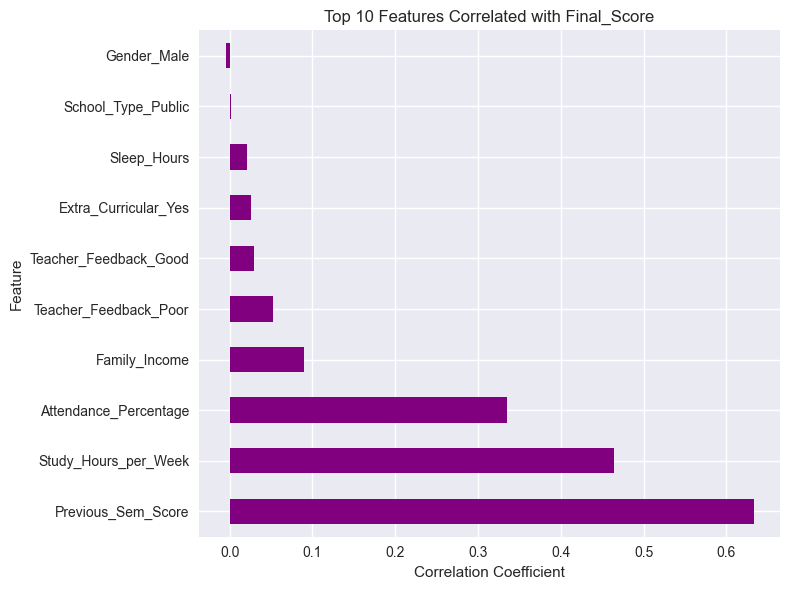

In [7]:
plt.figure(figsize=(8, 6))
target_correlation.drop('Final_Score').head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Features Correlated with Final_Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('--- Model Evaluation Metrics ---')
print(f'R-squared (R^2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


sample_X = X_test.iloc[0, :]
sample_true_y = y_test.iloc[0]
sample_pred_y = model.predict(sample_X.to_frame().T)[0]

print('\n--- Sample Prediction ---')
print(f'Actual Final Score: {sample_true_y:.2f}')
print(f'Predicted Final Score: {sample_pred_y:.2f}')

--- Model Evaluation Metrics ---
R-squared (R^2): 0.5416
Mean Absolute Error (MAE): 5.31
Root Mean Squared Error (RMSE): 6.56

--- Sample Prediction ---
Actual Final Score: 55.90
Predicted Final Score: 45.99


In [10]:
joblib_file = 'student_performance_lr_model.pkl'
joblib.dump(model, joblib_file)

print(f'Model saved successfully as "{joblib_file}"')

Model saved successfully as "student_performance_lr_model.pkl"


In [11]:
import joblib
joblib.dump(model, 'student_performance_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']